<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# ENTORNO DE PROGRAMACION

En este notebook vemos como podemos instalar las librerias de qiskit en un entorno distinto de IBM Quantum.

In [ ]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install pylatexenc
!pip install qiskit-ibmq-provider

In [1]:
import dotenv
dotenv.load_dotenv()

True

In [2]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.46.0', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
import os

from qiskit import IBMQ, Aer

IBMQ.save_account(os.environ['IBMQ_TOKEN'], overwrite=True) 

/tmp/ipykernel_45651/302882807.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(os.environ['IBMQ_TOKEN'], overwrite=True)


In [4]:
#list available backends - entornos de ejecucion disponibles para tu cuenta
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
#imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np
from math import pi

%matplotlib inline

In [6]:
#BUILD A CIRCUIT AND MEASUREMENT
qreg = QuantumRegister(3) # a 3-qubit register
creg = ClassicalRegister(3) # a 3-bit classical register
qc = QuantumCircuit(qreg,creg) # create a circuit

qreg_q=QuantumRegister(3,'q')
creg_c=ClassicalRegister(3,'c')
qc= QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.cx(qreg_q[0],qreg_q[1])
qc.cx(qreg_q[1],qreg_q[2])

qc.measure(qreg_q,creg_c)

result_counts ->  {'000': 254, '111': 258}


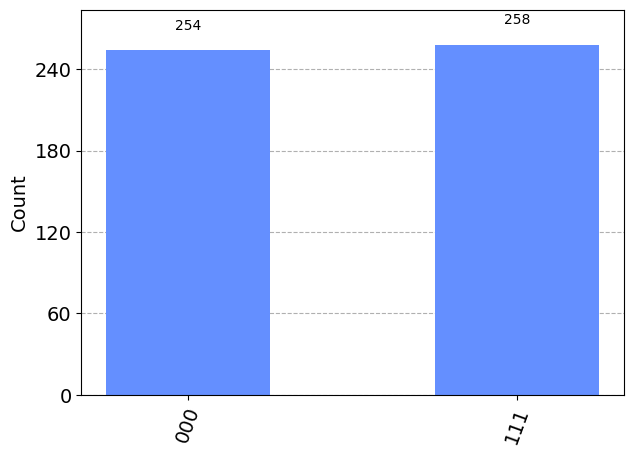

In [7]:
# COMPILIMG AND RUNNING -SIMMULATOR
backend=provider.get_backend('ibmq_qasm_simulator')
transpiled_qc = qiskit.transpile(qc, backend)
job = backend.run(transpiled_qc, shots=512)
result=job.result()
result_counts=result.get_counts()
print('result_counts -> ',result_counts)
plot_histogram(result_counts)# COMPILIMG AND RUNNING -SIMMULATOR

Al ejecutar en una QPU real tu trabajo se encola y puede tardar mucho en ejecutarse. 

Pdemos ir al Dashboard > Jobs de tu cuenta y ver el tiempo estimado de ejecucion en la cola

/tmp/ipykernel_45651/1519879865.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job=execute(qc,backend,shots=512) # shots default = 1024


result_counts ->  {'111': 244, '000': 231, '010': 3, '110': 11, '011': 5, '100': 4, '001': 13, '101': 1}


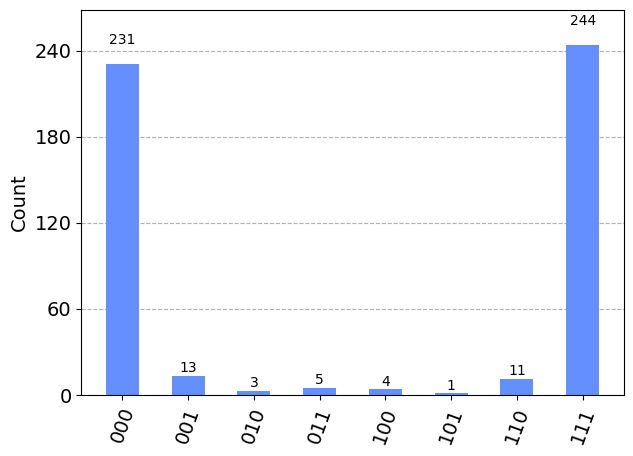

In [8]:
# COMPILIMG AND RUNNING - IBMQ QPU
backend=provider.get_backend('ibm_brisbane')
job=execute(qc,backend,shots=512) # shots default = 1024
result=job.result()
result_counts=result.get_counts()
print('result_counts -> ',result_counts)
plot_histogram(result_counts)